<a href="https://colab.research.google.com/github/undralg/ABC-inference/blob/main/capstone_understanding%20ibdsim%20and%20pedtools.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
library(ibdsim2) # for simulation
library(pedtools) # for visualization and creating pedigree objects with linear structure
set.seed(42) # google colab

In [ ]:
ped <- linearPed(2)
ped

 id fid mid sex
  1   *   *   1
  2   *   *   2
  3   1   2   1
  4   *   *   2
  5   3   4   1

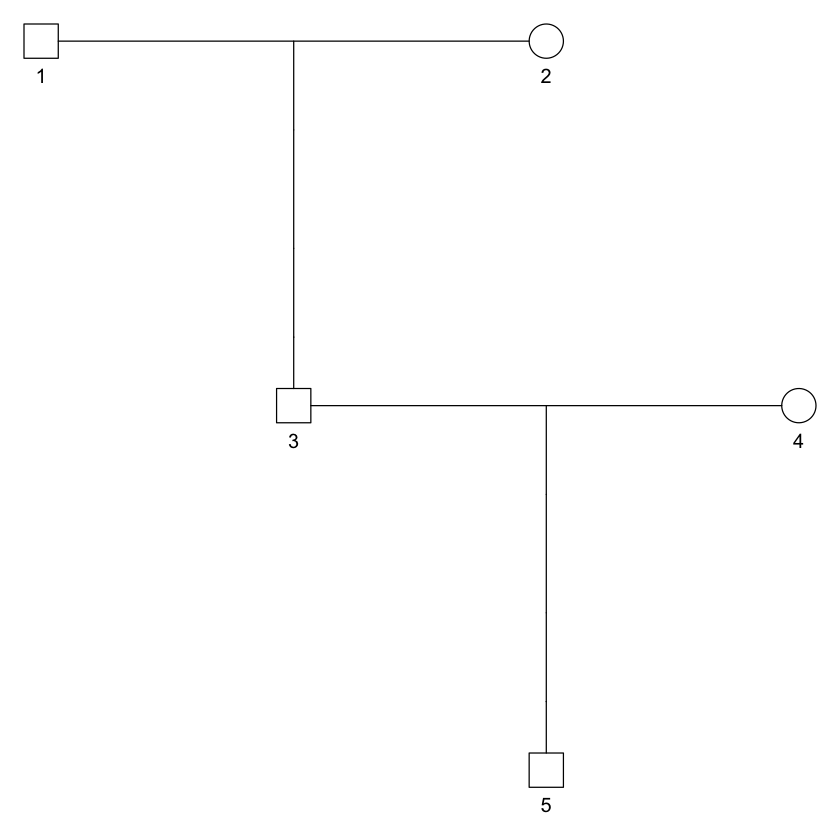

In [ ]:
plot(ped)

In [ ]:
sim <- ibdsim(ped) # should simulate a realistic full-genome IBD transmission. don't add
# a manual override for map
sim

# a person has 23 pairs of chromosomes, the last one is for sex.
# each row in the output represents a genomic segment on a chromosome where inheritance in unchanged
# 1:p column represents what founder haplotype person 1 inherited their paternal haplotype from.
# since person 1 and 2 are the founders, they just inherit their own haplotypes
# starting from 3:p, we start seeing variations.
# 3:p being 2 means person 3 inhertied their paternal haplotype from haplotype 2 (founder)
# haplotype 2 is person 1's haplotype
# This exact segment from chromosome 1 was inherited from person 1 to person 3
# person 1 --> haplotype 1 and 2
# person 2 --> haplotype 3 and 4
# person 4 --> haplotype 5 and 6

Simulation parameters:
Simulations  : 1
Chromosomes  : 1-22
Genome length: 2753.93 Mb
               2602.29 cM (male)
               4180.42 cM (female)
Recomb model : chi
Target indivs: 1-5
Skip recomb  : -

Total time used: 0.0085 secs



       chrom    startMB      endMB    startCM      endCM 1:p 1:m 2:p 2:m 3:p
  [1,]     1   1.431813  29.803428   0.000000  51.326273   1   2   3   4   1
  [2,]     1  29.803428  90.640955  51.326273 114.725124   1   2   3   4   1
  [3,]     1  90.640955 112.968921 114.725124 135.095582   1   2   3   4   1
  [4,]     1 112.968921 153.216974 135.095582 146.971138   1   2   3   4   1
  [5,]     1 153.216974 170.864065 146.971138 172.642091   1   2   3   4   2
  [6,]     1 170.864065 182.222154 172.642091 181.877196   1   2   3   4   1
  [7,]     1 182.222154 207.998449 181.877196 206.392525   1   2   3   4   1
  [8,]     1 207.998449 212.925020 206.392525 212.494009   1   2   3   4   1
  [9,]     1 212.925020 234.073018 212.494009 236.161011   1   2   3   4   1
 [10,]     1 234.073018 241.703602 236.161011 254.950765   1   2   3   4   1
 [11,]     1 241.703602 248.414390 254.950765 267.772741   1   2   3   4   1
 [12,]     2   0.522921   1.547115   0.000000   1.165348   1   2   3   4   1

In [ ]:
# Assuming sim is the matrix/data frame output with columns like "startCM", "endCM", "1:p", "1:m", "5:p", "5:m".
# Create a logical vector that identifies rows where person 1 and person 5 share a founder haplotype.
shared_rows <- (sim[,"1:p"] == sim[,"5:p"]) |
               (sim[,"1:p"] == sim[,"5:m"]) |
               (sim[,"1:m"] == sim[,"5:p"]) |
               (sim[,"1:m"] == sim[,"5:m"])

# Filter the segments to keep only shared (IBD) segments.
ibd_segments <- sim[shared_rows, ]

# Now compute total IBD (in centiMorgans)
total_ibd_cM <- sum(ibd_segments[,"endCM"] - ibd_segments[,"startCM"])
total_ibd_cM


[1] 1556.206